# Project Goals

* Load social security data about baby names
* Analyze name popularity across years
* Compute 10 most popular names for a year
* Identify name fads
* Challenge: Identify most-used unisex names

# Loading Dataset

* Uncompressing a zip archive
* Listing the contents of a directory
* Loading a CSV dataset into Pandas
* Concatenating DataFrames

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

In [2]:
%matplotlib inline

In [3]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [4]:
import os
os.listdir('names')

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [5]:
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

In [6]:
names2011 = pd.read_csv('names/yob2011.txt')

In [7]:
names2011

,Sophia,F,21816
0,Isabella,F,19870
1,Emma,F,18777
2,Olivia,F,17294
3,Ava,F,15480
4,Emily,F,14236
5,Abigail,F,13229
6,Madison,F,12360
7,Mia,F,11512
8,Chloe,F,10970
9,Elizabeth,F,10062


In [8]:
names2011 = pd.read_csv('names/yob2011.txt', names=['name', 'sex', 'number'])

In [9]:
names2011.head()

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


In [10]:
names_all = []

for year in range(1880, 2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year), names=['name', 'sex', 'number']))
    names_all[-1]['year'] = year 
    
all_years = pd.concat(names_all)
all_years   

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [11]:
names_all[-1]

,name,sex,number,year
0,Emma,F,20799,2014
1,Olivia,F,19674,2014
2,Sophia,F,18490,2014
3,Isabella,F,16950,2014
4,Ava,F,15586,2014
5,Mia,F,13442,2014
6,Emily,F,12562,2014
7,Abigail,F,11985,2014
8,Madison,F,10247,2014
9,Charlotte,F,10048,2014


# Name Popularity

* Setting and sorting indexes
* Selecting rows by index value
* Making a stacked line plot in matplotlib

In [12]:
all_years_indexed = all_years.set_index(['sex','name','year']).sort_index()

In [13]:
all_years_indexed.head()

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5

In [14]:
all_years_indexed.loc['F','Mary'].head()

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217


In [15]:
def plotname(sex, name):
    data = all_years_indexed.loc[sex,name]
    
    plt.plot(data.index, data.values)

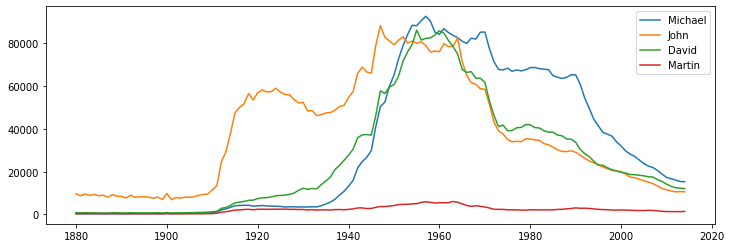

In [16]:
plt.figure(figsize=(12,4))

names = ['Michael', 'John', 'David', 'Martin']

for name in names:
    plotname('M', name)
    
plt.legend(names)

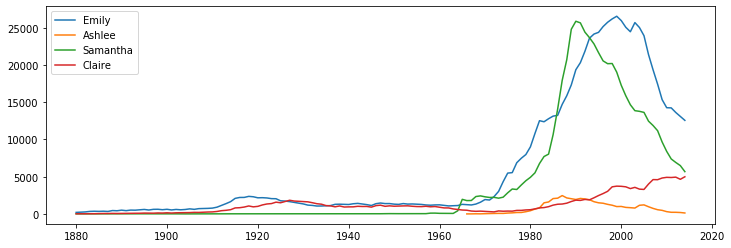

In [17]:
plt.figure(figsize=(12,4))

names = ['Emily','Ashlee','Samantha','Claire']

for name in names:
    plotname('F', name)
    
plt.legend(names)

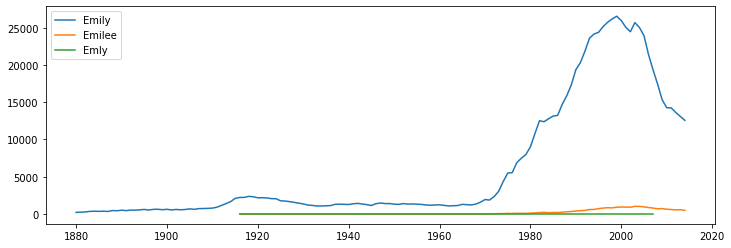

In [18]:
plt.figure(figsize=(12,4))

names = ['Emily','Emilee','Emly']

for name in names:
    plotname('F', name)
    
plt.legend(names)

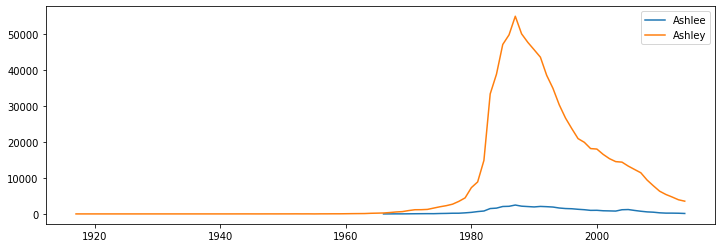

In [19]:
plt.figure(figsize=(12,4))

names = ['Ashlee','Ashley']

for name in names:
    plotname('F', name)
    
plt.legend(names)

In [20]:
names = ['Chiara','Claire','Clare','Clara','Ciara']

In [21]:
all_years_indexed.loc['F'].loc[names].head()

number
name   year        
Chiara 1959       9
       1960       5
       1962       8
       1963       8
       1964      12

In [22]:
all_years_indexed.loc['F'].loc[names].unstack(level=0)

number                               
name Chiara   Ciara  Claire   Clara  Clare
year                                      
1880    NaN     NaN    21.0  1226.0   15.0
1881    NaN     NaN    23.0  1242.0   20.0
1882    NaN     NaN    30.0  1490.0   21.0
1883    NaN     NaN    38.0  1548.0   22.0
1884    NaN     NaN    33.0  1852.0   38.0
1885    NaN     NaN    49.0  1910.0   27.0
1886    NaN     NaN    61.0  1916.0   26.0
1887    NaN     NaN    58.0  1984.0   31.0
1888    NaN     NaN    73.0  2230.0   43.0
1889    NaN     NaN    62.0  2319.0   34.0
1890    NaN     NaN    72.0  2496.0   35.0
1891    NaN     NaN    84.0  2360.0   34.0
1892    NaN     NaN    86.0  2661.0   56.0
1893    NaN     NaN    92.0  2532.0   30.0
1894    NaN     NaN    96.0  2603.0   56.0
1895    NaN     NaN   118.0  2613.0   47.0
1896    NaN     NaN   106.0  2582.0   53.0
1897    NaN     NaN   105.0  2454.0   48.0
1898    NaN     NaN   133.0  2731.0   59.0
1899    NaN     NaN   121.0  2441.0   37.0
1900    NaN     NaN   156.0  2826.0   63.0
1901    NaN     NaN   122.0  2319.0   47.0
1902    NaN     NaN   156.0  2432.0   57.0
1903    NaN     NaN   164.0  2342.0   57.0
1904    NaN     NaN   163.0  2281.0   59.0
1905    NaN     NaN   184.0  2397.0   67.0
1906    NaN     NaN   213.0  2228.0   59.0
1907    NaN     NaN   206.0  2319.0   55.0
1908    NaN     NaN   235.0  2352.0   70.0
1909    NaN     NaN   259.0  2403.0   73.0
...     ...     ...     ...     ...    ...
1985   42.0   549.0  1185.0   357.0  208.0
1986   46.0   733.0  1304.0   387.0  211.0
1987   48.0   770.0  1332.0   402.0  248.0
1988   54.0   703.0  1446.0   418.0  252.0
1989   49.0   883.0  1670.0   424.0  280.0
1990   62.0   944.0  1851.0   466.0  338.0
1991   53.0  1050.0  1818.0   524.0  323.0
1992   71.0  1369.0  1948.0   536.0  323.0
1993   59.0  1436.0  1894.0   592.0  328.0
1994   74.0  1401.0  2172.0   585.0  355.0
1995  104.0  1585.0  2473.0   656.0  387.0
1996   98.0  1430.0  2737.0   661.0  450.0
1997  100.0  1401.0  3039.0   643.0  446.0
1998   93.0  1230.0  3641.0   759.0  510.0
1999  121.0  1218.0  3732.0   782.0  507.0
2000  120.0  1139.0  3710.0   868.0  484.0
2001  139.0  1005.0  3641.0   951.0  461.0
2002  203.0   904.0  3404.0  1022.0  433.0
2003  186.0   791.0  3570.0  1049.0  417.0
2004  201.0   977.0  3333.0  1162.0  419.0
2005  183.0  2320.0  3291.0  1322.0  411.0
2006  172.0  1605.0  4012.0  1493.0  438.0
2007  176.0  1361.0  4611.0  1545.0  473.0
2008  155.0  1038.0  4598.0  1646.0  452.0
2009  183.0   888.0  4824.0  1644.0  404.0
2010  145.0   698.0  4914.0  1836.0  420.0
2011  133.0   550.0  4893.0  2072.0  414.0
2012  111.0   471.0  4941.0  2331.0  379.0
2013  141.0   435.0  4651.0  2499.0  376.0
2014  131.0   418.0  4991.0  2833.0  383.0

[135 rows x 5 columns]

In [23]:
variants = all_years_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)

In [24]:
variants

number                               
name Chiara   Ciara  Claire   Clara  Clare
year                                      
1880    0.0     0.0    21.0  1226.0   15.0
1881    0.0     0.0    23.0  1242.0   20.0
1882    0.0     0.0    30.0  1490.0   21.0
1883    0.0     0.0    38.0  1548.0   22.0
1884    0.0     0.0    33.0  1852.0   38.0
1885    0.0     0.0    49.0  1910.0   27.0
1886    0.0     0.0    61.0  1916.0   26.0
1887    0.0     0.0    58.0  1984.0   31.0
1888    0.0     0.0    73.0  2230.0   43.0
1889    0.0     0.0    62.0  2319.0   34.0
1890    0.0     0.0    72.0  2496.0   35.0
1891    0.0     0.0    84.0  2360.0   34.0
1892    0.0     0.0    86.0  2661.0   56.0
1893    0.0     0.0    92.0  2532.0   30.0
1894    0.0     0.0    96.0  2603.0   56.0
1895    0.0     0.0   118.0  2613.0   47.0
1896    0.0     0.0   106.0  2582.0   53.0
1897    0.0     0.0   105.0  2454.0   48.0
1898    0.0     0.0   133.0  2731.0   59.0
1899    0.0     0.0   121.0  2441.0   37.0
1900    0.0     0.0   156.0  2826.0   63.0
1901    0.0     0.0   122.0  2319.0   47.0
1902    0.0     0.0   156.0  2432.0   57.0
1903    0.0     0.0   164.0  2342.0   57.0
1904    0.0     0.0   163.0  2281.0   59.0
1905    0.0     0.0   184.0  2397.0   67.0
1906    0.0     0.0   213.0  2228.0   59.0
1907    0.0     0.0   206.0  2319.0   55.0
1908    0.0     0.0   235.0  2352.0   70.0
1909    0.0     0.0   259.0  2403.0   73.0
...     ...     ...     ...     ...    ...
1985   42.0   549.0  1185.0   357.0  208.0
1986   46.0   733.0  1304.0   387.0  211.0
1987   48.0   770.0  1332.0   402.0  248.0
1988   54.0   703.0  1446.0   418.0  252.0
1989   49.0   883.0  1670.0   424.0  280.0
1990   62.0   944.0  1851.0   466.0  338.0
1991   53.0  1050.0  1818.0   524.0  323.0
1992   71.0  1369.0  1948.0   536.0  323.0
1993   59.0  1436.0  1894.0   592.0  328.0
1994   74.0  1401.0  2172.0   585.0  355.0
1995  104.0  1585.0  2473.0   656.0  387.0
1996   98.0  1430.0  2737.0   661.0  450.0
1997  100.0  1401.0  3039.0   643.0  446.0
1998   93.0  1230.0  3641.0   759.0  510.0
1999  121.0  1218.0  3732.0   782.0  507.0
2000  120.0  1139.0  3710.0   868.0  484.0
2001  139.0  1005.0  3641.0   951.0  461.0
2002  203.0   904.0  3404.0  1022.0  433.0
2003  186.0   791.0  3570.0  1049.0  417.0
2004  201.0   977.0  3333.0  1162.0  419.0
2005  183.0  2320.0  3291.0  1322.0  411.0
2006  172.0  1605.0  4012.0  1493.0  438.0
2007  176.0  1361.0  4611.0  1545.0  473.0
2008  155.0  1038.0  4598.0  1646.0  452.0
2009  183.0   888.0  4824.0  1644.0  404.0
2010  145.0   698.0  4914.0  1836.0  420.0
2011  133.0   550.0  4893.0  2072.0  414.0
2012  111.0   471.0  4941.0  2331.0  379.0
2013  141.0   435.0  4651.0  2499.0  376.0
2014  131.0   418.0  4991.0  2833.0  383.0

[135 rows x 5 columns]

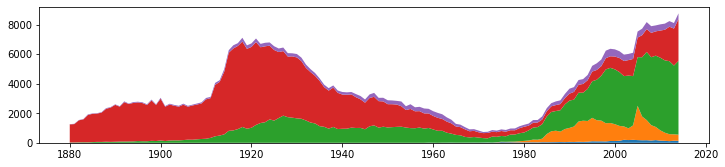

In [25]:
plt.figure(figsize=(12,2.5))

plt.stackplot(variants.index, variants.values.T)

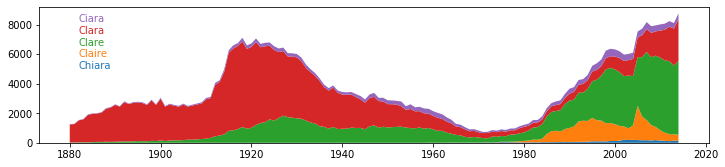

In [26]:
plt.figure(figsize=(12,2.5))

palette = seaborn.color_palette()
plt.stackplot(variants.index, variants.values.T,colors=palette)

for i,name in enumerate(names):
    plt.text(1882,5000+800*i,name,color=palette[i])

# A yearly top ten

* Sorting a DataFrame by a column
* Dropping columns from a DataFrame
* Joining frames based on index
* Counting values in a Series

In [27]:
all_years_indexed.loc['M',:,2008].sort_values('number', ascending=False).head()

number
sex name    year        
M   Jacob   2008   22568
    Michael 2008   20590
    Ethan   2008   20196
    Joshua  2008   19186
    Daniel  2008   18985

In [28]:
pop2018 = all_years_indexed.loc['M',:,2008].sort_values('number', ascending=False).head()

In [29]:
pop2018.reset_index().drop(['sex','number','year'], axis=1).head()

,name
0,Jacob
1,Michael
2,Ethan
3,Joshua
4,Daniel


In [30]:
def topten(sex,year):
    simple = all_years_indexed.loc[sex,:,year].sort_values('number', ascending=False).reset_index()
    simple = simple.drop(['sex','year','number'],axis=1).head(10)
    
    simple.columns = [year]
    simple.index = simple.index + 1
    
    return simple

In [31]:
topten('M', 2009)

,2009
1,Jacob
2,Ethan
3,Michael
4,Alexander
5,William
6,Joshua
7,Daniel
8,Jayden
9,Noah
10,Christopher


In [32]:
def toptens(sex,startyear,endyear):
    years = [topten(sex,year) for year in range(startyear, endyear+1)]
    
    return years[0].join(years[1:])

In [33]:
toptens('M', 1990, 2014)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Jacob,...,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Noah,Noah
2,Christopher,Christopher,Christopher,Christopher,Christopher,Matthew,Matthew,Jacob,Jacob,Michael,...,Michael,Michael,Michael,Michael,Ethan,Ethan,Mason,Mason,Liam,Liam
3,Matthew,Matthew,Matthew,Matthew,Matthew,Christopher,Jacob,Matthew,Matthew,Matthew,...,Joshua,Joshua,Ethan,Ethan,Michael,Michael,William,Ethan,Jacob,Mason
4,Joshua,Joshua,Joshua,Joshua,Joshua,Jacob,Christopher,Christopher,Joshua,Joshua,...,Matthew,Ethan,Joshua,Joshua,Alexander,Jayden,Jayden,Noah,Mason,Jacob
5,Daniel,Andrew,Andrew,Tyler,Tyler,Joshua,Joshua,Joshua,Christopher,Nicholas,...,Ethan,Matthew,Daniel,Daniel,William,William,Noah,William,William,William
6,David,Daniel,Brandon,Brandon,Brandon,Nicholas,Nicholas,Nicholas,Nicholas,Christopher,...,Andrew,Daniel,Christopher,Alexander,Joshua,Alexander,Michael,Liam,Ethan,Ethan
7,Andrew,James,Daniel,Daniel,Jacob,Tyler,Tyler,Brandon,Brandon,Andrew,...,Daniel,Andrew,Anthony,William,Daniel,Noah,Ethan,Michael,Michael,Michael
8,James,David,Tyler,Nicholas,Daniel,Brandon,Brandon,Andrew,Tyler,Joseph,...,Anthony,Christopher,William,Anthony,Jayden,Daniel,Alexander,Jayden,Alexander,Alexander
9,Justin,Joseph,James,Jacob,Nicholas,Daniel,Austin,Austin,Andrew,Daniel,...,Joseph,Anthony,Matthew,Christopher,Noah,Aiden,Aiden,Alexander,Jayden,James
10,Joseph,John,David,Andrew,Andrew,Austin,Andrew,Tyler,Austin,Tyler,...,Christopher,William,Andrew,Matthew,Christopher,Anthony,Daniel,Aiden,Daniel,Daniel


In [34]:
toptens('F', 1985, 1995)

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
1,Jessica,Jessica,Jessica,Jessica,Jessica,Jessica,Ashley,Ashley,Jessica,Jessica,Jessica
2,Ashley,Ashley,Ashley,Ashley,Ashley,Ashley,Jessica,Jessica,Ashley,Ashley,Ashley
3,Jennifer,Amanda,Amanda,Amanda,Brittany,Brittany,Brittany,Amanda,Sarah,Emily,Emily
4,Amanda,Jennifer,Jennifer,Sarah,Amanda,Amanda,Amanda,Brittany,Samantha,Samantha,Samantha
5,Sarah,Sarah,Sarah,Jennifer,Sarah,Samantha,Samantha,Sarah,Emily,Sarah,Sarah
6,Stephanie,Stephanie,Stephanie,Brittany,Samantha,Sarah,Sarah,Samantha,Brittany,Taylor,Taylor
7,Nicole,Nicole,Brittany,Stephanie,Jennifer,Stephanie,Stephanie,Emily,Taylor,Brittany,Hannah
8,Heather,Brittany,Nicole,Samantha,Stephanie,Jennifer,Jennifer,Stephanie,Amanda,Amanda,Brittany
9,Elizabeth,Heather,Heather,Nicole,Lauren,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Amanda
10,Megan,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Lauren,Emily,Megan,Stephanie,Megan,Elizabeth


In [35]:
toptens('F', 1985, 1995).stack().head()

1  1985    Jessica
   1986    Jessica
   1987    Jessica
   1988    Jessica
   1989    Jessica
dtype: object

In [36]:
toptens('F', 1985, 1995).stack().value_counts()

Sarah        11
Elizabeth    11
Amanda       11
Jessica      11
Ashley       11
Brittany     10
Stephanie     9
Samantha      8
Jennifer      7
Emily         5
Nicole        4
Heather       3
Taylor        3
Megan         3
Lauren        2
Hannah        1
dtype: int64

In [37]:
popular = toptens('F', 1985, 1995).stack().value_counts().index[:6]
popular

Index(['Sarah', 'Elizabeth', 'Amanda', 'Jessica', 'Ashley', 'Brittany'], dtype='object')

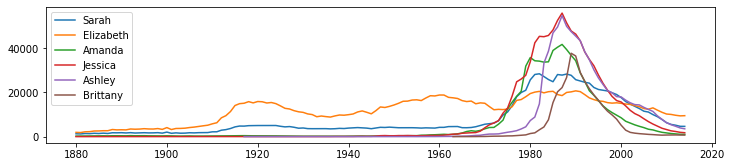

In [38]:
plt.figure(figsize=(12,2.5))

for name in popular:
    plotname('F', name)
    
plt.legend(popular)

# Name fads

* Grouping data with groupby
* Computing aggregations
* Combining Boolean masks

In [39]:
all_years.groupby(['sex','name']).sum().head()

number   year
sex name                    
F   Aabha          21   6037
    Aabriella      10   4022
    Aaden           5   2009
    Aadhira        29   6039
    Aadhya        639  16084

In [40]:
all_years.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [41]:
all_years.groupby(['sex','name'])['number'].sum().head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

In [42]:
totals = all_years.groupby(['sex','name'])['number'].sum()

In [43]:
totals.head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

In [44]:
def sumsq(x):
    return sum(x**2)

In [45]:
result = all_years.groupby(['sex','name'])['number'].agg(sumsq)
print(result.head())

sex  name     
F    Aabha           155
     Aabriella        50
     Aaden            25
     Aadhira         305
     Aadhya       107255
Name: number, dtype: int64


In [46]:
spikyness = all_years.groupby(['sex','name'])['number'].agg(sumsq) / totals**2
spikyness.head()

sex  name     
F    Aabha        0.351474
     Aabriella    0.500000
     Aaden        1.000000
     Aadhira      0.362663
     Aadhya       0.262673
Name: number, dtype: float64

In [47]:
spikyness[totals > 5000].loc['M','Iker']

0.19936813237275397

In [48]:
spiky_common = spikyness[totals > 5000].copy()
spiky_common = spiky_common.sort_values(ascending=False)
spiky_common.head(10)

sex  name     
M    Iker         0.199368
     Shaquille    0.195689
     Jase         0.182165
F    Adalynn      0.177107
     Harper       0.164827
M    Brantley     0.160532
F    Arya         0.159564
M    Bentley      0.159259
F    Miley        0.145886
     Paisley      0.144966
Name: number, dtype: float64

In [49]:
spiky_common.head(10)

sex  name     
M    Iker         0.199368
     Shaquille    0.195689
     Jase         0.182165
F    Adalynn      0.177107
     Harper       0.164827
M    Brantley     0.160532
F    Arya         0.159564
M    Bentley      0.159259
F    Miley        0.145886
     Paisley      0.144966
Name: number, dtype: float64

In [50]:
spiky_common.tail(10)

sex  name   
F    Minerva    0.008853
     Nina       0.008752
     Celia      0.008639
M    Will       0.008635
     Hiram      0.008618
F    Rosa       0.008512
     Mollie     0.008437
M    Ike        0.008310
F    Delia      0.008263
     Louisa     0.007931
Name: number, dtype: float64

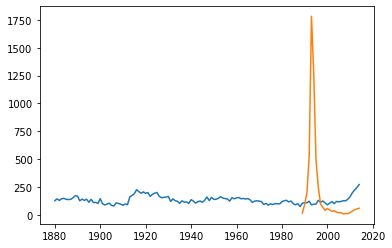

In [51]:
plotname('F', 'Louisa')
plotname('M', 'Shaquille')

In [52]:
fads = spiky_common.head(10).index.values
fads

array([('M', 'Iker'), ('M', 'Shaquille'), ('M', 'Jase'), ('F', 'Adalynn'),
       ('F', 'Harper'), ('M', 'Brantley'), ('F', 'Arya'),
       ('M', 'Bentley'), ('F', 'Miley'), ('F', 'Paisley')], dtype=object)

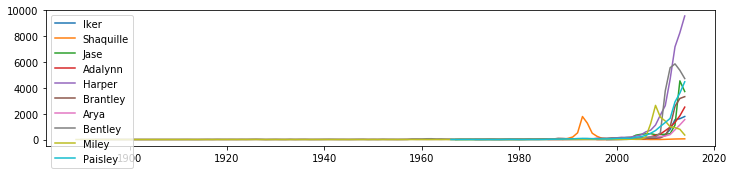

In [53]:
plt.figure(figsize=(12,2.5))

for sex,name in fads:
    plotname(sex,name)
    
plt.legend([name for sex,name in fads],loc='upper left')

In [54]:
total_recent = all_years[all_years['year'] > 2005].groupby(['sex','name'])['number'].sum()
total_recent.sort_values(ascending=False).head()

sex  name    
M    Jacob       189021
F    Isabella    174556
     Emma        172824
     Sophia      167839
M    Ethan       165647
Name: number, dtype: int64

In [55]:
spiky_common = spikyness[(totals > 5000) & (total_recent < 1000)].copy()
spiky_common = spiky_common.sort_values(ascending=False)
spiky_common.head(10)

sex  name     
M    Shaquille    0.195689
F    Katina       0.120872
     Krystle      0.100106
M    Devante      0.099617
F    Khadijah     0.091410
     Shanice      0.089675
     Iesha        0.088810
     Shaniqua     0.087601
     Sheena       0.080751
     Marquita     0.080338
Name: number, dtype: float64

In [56]:
fads = spiky_common.head(10).index.values
fads

array([('M', 'Shaquille'), ('F', 'Katina'), ('F', 'Krystle'),
       ('M', 'Devante'), ('F', 'Khadijah'), ('F', 'Shanice'),
       ('F', 'Iesha'), ('F', 'Shaniqua'), ('F', 'Sheena'),
       ('F', 'Marquita')], dtype=object)

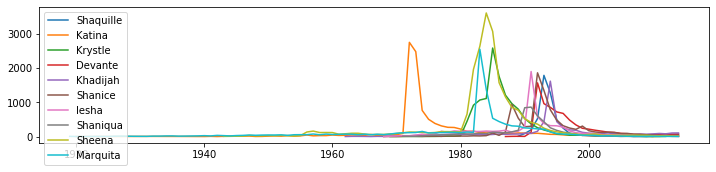

In [57]:
plt.figure(figsize=(12,2.5))

for sex,name in fads:
    plotname(sex,name)
    
plt.legend([name for sex,name in fads],loc='upper left')

# Challenge Objectives

* Compute the number of times that each name was used, separately for boys and girls
* Identify the unisex names where the ratio between the boys and girls totals is between 1-to-4 and 4-to-1
* Plot popularity vs. year for the top 10 unisex names

In [58]:
totals = all_years.groupby(['sex','name'])['number'].sum()

In [59]:
totals.head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

In [60]:
totals_bysex = totals.unstack('sex')
totals_bysex.head()

sex,F,M
name,,
Aaban,NaN,72.0
Aabha,21.0,NaN
Aabid,NaN,5.0
Aabriella,10.0,NaN
Aadam,NaN,196.0


In [61]:
totals_both = totals_bysex.sum(axis=1)

In [62]:
totals_both.head()

name
Aaban         72.0
Aabha         21.0
Aabid          5.0
Aabriella     10.0
Aadam        196.0
dtype: float64

In [63]:
ratio = totals_bysex['F'] / totals_bysex['M']

In [64]:
ratio.head()

name
Aaban       NaN
Aabha       NaN
Aabid       NaN
Aabriella   NaN
Aadam       NaN
dtype: float64

In [65]:
unisex = (ratio > 0.25) & (ratio < 4)

In [66]:
totals_both = totals_both[unisex]
totals_both = totals_both.sort_values(ascending=False)
totals_both.head(10)

name
Willie    593888.0
Jordan    479434.0
Taylor    416096.0
Leslie    376587.0
Jamie     350262.0
Angel     301425.0
Lee       291691.0
Jessie    274931.0
Marion    259549.0
Dana      243517.0
dtype: float64

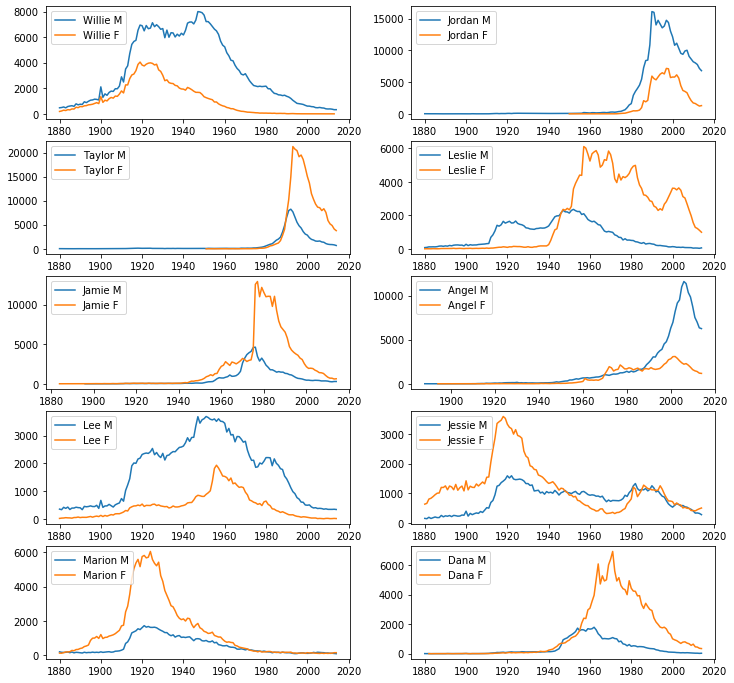

In [67]:
names = totals_both.head(10).index.values

plt.figure(figsize=(12,12))

for i,name in enumerate(names):
    plt.subplot(5,2,i+1)
    plotname('M', name)
    plotname('F', name)
    
    plt.legend([name + ' M', name + ' F'], loc='upper left')